In [1]:
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt

In [2]:

time = torch.arange(0.,20).float()
print(time)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])


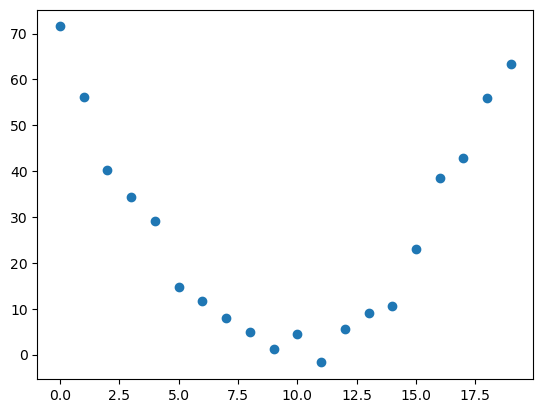

In [3]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 +1
plt.scatter(time,speed)

## a*(time**2)+(b*time)+c

In [4]:
def f(t,params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [5]:
#Mean Squared Error
def mse(preds,targets):
    return ((preds-targets)**2).mean()

# Step 1: Initialize the parameters

In [6]:
params = torch.randn(3).requires_grad_()
params

tensor([-0.5105,  0.5444, -0.9421], requires_grad=True)

# Calculate the predictions

In [7]:
preds = f(time,params)
preds

tensor([  -0.9421,   -0.9082,   -1.8953,   -3.9033,   -6.9324,  -10.9826,
         -16.0537,  -22.1458,  -29.2590,  -37.3932,  -46.5483,  -56.7245,
         -67.9217,  -80.1400,  -93.3792, -107.6394, -122.9207, -139.2230,
        -156.5462, -174.8905], grad_fn=<AddBackward0>)

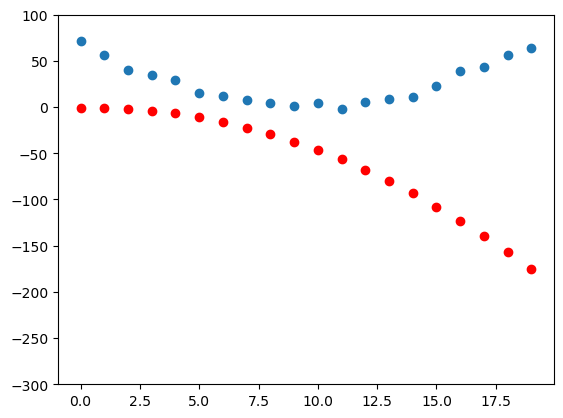

In [8]:
def show_preds(preds,ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time,to_np(preds),color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

# Step 3:  Calculate the loss

In [9]:
loss = mse(preds,speed)
loss

tensor(11306.3750, grad_fn=<MeanBackward0>)

# Step 4: Calculate the gradients

In [10]:
loss.backward()
params.grad

tensor([-34566.2070,  -2213.5229,   -170.0261])

In [11]:
params.grad * 1e-5

tensor([-0.3457, -0.0221, -0.0017])

In [12]:
params

tensor([-0.5105,  0.5444, -0.9421], requires_grad=True)

# Step 5: Step the weights

In [13]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

preds = f(time,params)
mse(preds,speed)

tensor(2698.1206, grad_fn=<MeanBackward0>)

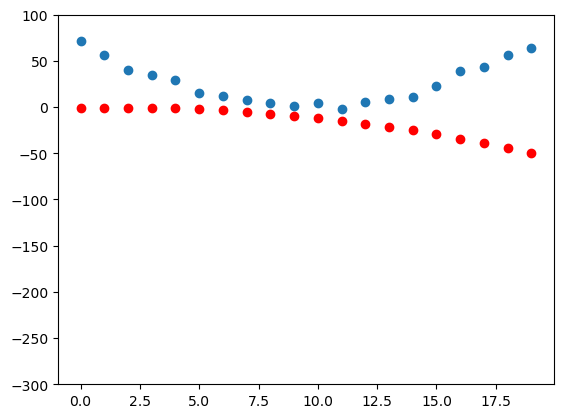

In [14]:
show_preds(preds)

In [15]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

# Step 6: Repeat the process

In [16]:
#for i in range(10): apply_step(params)

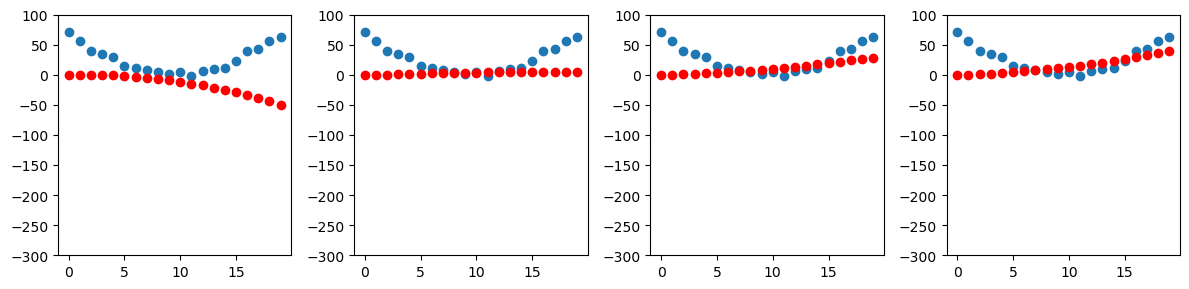

In [17]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()